# Practice assignment week 3-2

This week we will work with a dataset that is not completely perfect and which will need refinement. To do this we will check the quality of the data with quantitative and visual analysis. 

The dataset is the Tianic dataset. It contains data on passengers on board the Titanic ship, which sunk more than 100 years ago when it crashed into an iceberg. The dataset is from Kaggle.com and is used a lot for machine learning class examples. The ultimate goal is to be able to predict whether someone survives the Titanic crash, based on the characteristics provided in the dataset. To be able to do that, we will need to inspect the relationships between the variables. You are provided with a file that contains information on the columns

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('Dataset3.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Lets look at the missing values. Using the function isna(). This creates a tables with True and False. When we put sum behind is is sums the trues by column

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This is not too bad.  177 have a missing age and from 2 we miss the place they embarked. Cabin number is the only one that has a lot of missing values. Lets start with Embarked

In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We see S is the most frequent value followed by C and Q
We ca do 3 things with the missing values
1. Remove
2. Create a new category "missing"
3. Fill the data 

We will show all three

In [12]:
data_removed = data.loc[~data['Embarked'].isna(), :]
data_removed.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

data['Embarked'].isna() gives a column ith TRUE and FALSE. By putting an ~ in front the TRUE's become FALSE's and vice versa. The disadvantage of course is thet we now miss 2 rows which could have contained valueable information.

Now we create a new category for missing values. This can be helpful when you think the fact that a value is missing says something about their survival chance (which is not very likely in this case)

In [13]:
import copy 
# Make new dataset
data_new_cat = copy.deepcopy(data) 
# Replacen
data_new_cat['Embarked'] = data_new_cat['Embarked'].fillna('Missing')
data_new_cat['Embarked'].value_counts()

S          644
C          168
Q           77
Missing      2
Name: Embarked, dtype: int64

Het laatste wat we nog met de dataset kunnen doen is om de data te vullen. Hier zijn verschillende opties voor. Het makkelijkst is de data vullen met de meest voorkomende waarde S. Dit gaat op dezelfde manier las hiervoor:
The last option is filling the data. We have multiple options but most common is filling it with the most frequent value 'S'

In [14]:
import copy 
# New dataset
data_replace1 = copy.deepcopy(data) 
# Waarden vervangen
data_replace1['Embarked'] = data_replace1['Embarked'].fillna('S')
data_replace1['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

We filled the missing values by 'S'. Another option is looking at the missing values and see wheter it has characteristics similar to other observations and use the embarked value from those observations

In [15]:
data.loc[data['Embarked'].isna(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The first one is a female from the first class with age 38. Lets find all such passengers

In [16]:
# Create group
group_person1 = data.loc[(data['Pclass']==1) & 
                          (data['Sex']=='female') & 
                          (data['Age']==38), :]
group_person1                        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


This is not very useful, the group is way too small to use. There is another this we can do. As you can see all passingers have a cabin number. Maybe we can use that

In [17]:
cabin = data.loc[data['Cabin']=='B28', :]
cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Still the same passengers, Ticket number doenst work either.

In [18]:
ticketgroup = data.loc[data['Ticket']==113572, :]
ticketgroup

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Filling with 'S' is still the best guess

Now look at age. Again, we have multiple options. As we are dealing with 177 values we are definitely not throwing them away. So lets fill it by the mean. But first check the distribution of age with a histogram.

<AxesSubplot:>

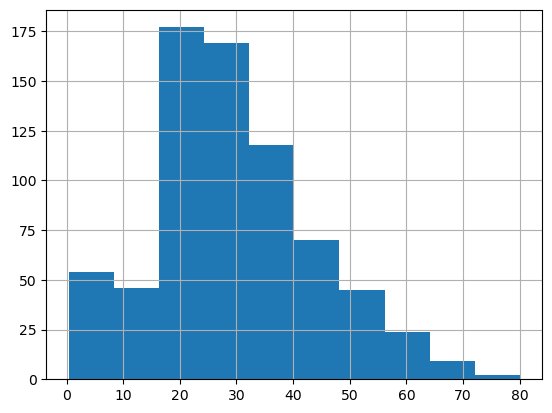

In [19]:
data['Age'].hist()

The histograms shows the distribution of age over different age classes. Missing values are not used. The x-axis shows the age classes. The y-axis shows the frequency. We see that around 20 is most frequent. Let's check the mean

In [20]:
mean = data['Age'].mean()
mean

29.69911764705882

And now, fill the data with the mean

<AxesSubplot:>

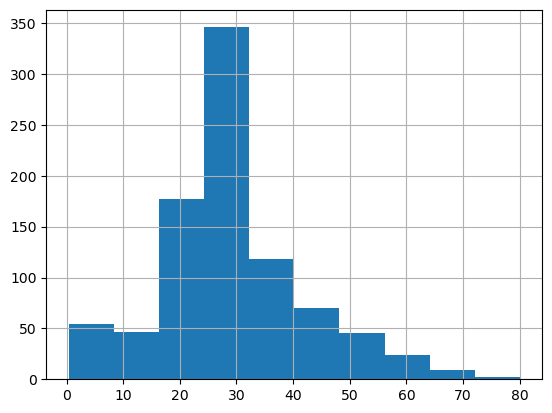

In [21]:
# NMake new dataset with deepcopy 
data_average_age = copy.deepcopy(data) 
# replace missing values with fillna. The argument in fillna is the value you want to fill the na's with
data_average_age['Age'] = data_average_age['Age'].fillna(mean)
data_average_age['Age'].hist()

By adding the missing value we added 177 values to the category around 20. THis is not very realistic. A better way would be to fill the data by group. We make groups, for exmample male and female and fill them with their respective ages. In this case we use passenger class, sex and parch as there is a lot of variation between the groups

In [15]:
averages = data.groupby(['Pclass', 'Sex', 'Parch'])['Age'].mean().reset_index()
averages

,Pclass,Sex,Parch,Age
0,1,female,0,36.285714
1,1,female,1,38.812500
2,1,female,2,22.230769
3,1,male,0,42.506410
4,1,male,1,44.071429
5,1,male,2,21.615000
6,1,male,4,64.000000
7,2,female,0,32.058140
8,2,female,1,24.666667
9,2,female,2,20.454545


In [22]:
data_age_filled_erik = copy.deepcopy(data)
data_age_filled_erik['Age'] = data_age_filled_erik['Age'].fillna(data_age_filled_erik.groupby(['Pclass', 'Sex', 'Parch'])['Age'].transform('mean'))
data_age_filled_erik.isna().sum()
data_age_filled_erik

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,13.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Now we only need to fill cabin. We have 2 options
1. Make a new catgeory 'missing'
2. Trying to find the cabin number based on the ticket number

The second option does not work however (you can check this yoursel). So we are left with option 1.

In [23]:
# New dataset
data_replaced2 = copy.deepcopy(data) 
# replace
data_replaced2['Cabin'] = data_replace1['Cabin'].fillna('Missing')
data_replaced2['Cabin'].value_counts()

Missing        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

# Outliers

We will also check for outliers. We already looked at age. Now, look at fare

<AxesSubplot:>

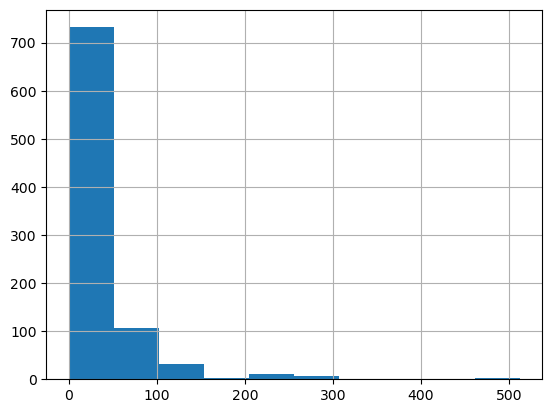

In [24]:
data['Fare'].hist()

Most people paid between 0 and 50 a small group paid over 20. Let's examine them

In [27]:
data.loc[data['Fare']>200, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


Although the differences are small, The values are not unlikely. The passengers all come from the first class.

Other numeric variables are Sibsp and Parch

In [29]:
print(data['SibSp'].value_counts())
print(data['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Although 8 siblings can be a lot, it is still not unlikely. There dont's seem to be outliers

In [30]:
import numpy as np
from scipy import stats



data['Fare_z_score'] = np.abs(stats.zscore(data['Fare']))
data['Fare_z_score'].head(10)

0    0.502445
1    0.786845
2    0.488854
3    0.420730
4    0.486337
5    0.478116
6    0.395814
7    0.224083
8    0.424256
9    0.042956
Name: Fare_z_score, dtype: float64

Delete outliers (z score above 2 for example

In [31]:
data = data[data['Fare_z_score'] < 2]

In [34]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   853 non-null    int64  
 1   Survived      853 non-null    int64  
 2   Pclass        853 non-null    int64  
 3   Name          853 non-null    object 
 4   Sex           853 non-null    object 
 5   Age           680 non-null    float64
 6   SibSp         853 non-null    int64  
 7   Parch         853 non-null    int64  
 8   Ticket        853 non-null    object 
 9   Fare          853 non-null    float64
 10  Cabin         174 non-null    object 
 11  Embarked      851 non-null    object 
 12  Fare_z_score  853 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 93.3+ KB


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             173
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           679
Embarked          2
Fare_z_score      0
dtype: int64